# Import Important Library

In [1]:
!pip install datasets

  Using cached fsspec-2024.12.0-py3-none-any.whl.metadata (11 kB)
Using cached fsspec-2024.12.0-py3-none-any.whl (183 kB)
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.


In [13]:
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import Dataset

#1. Review Classification



#Load and preprocess dataset

In [23]:
df = pd.read_csv("/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

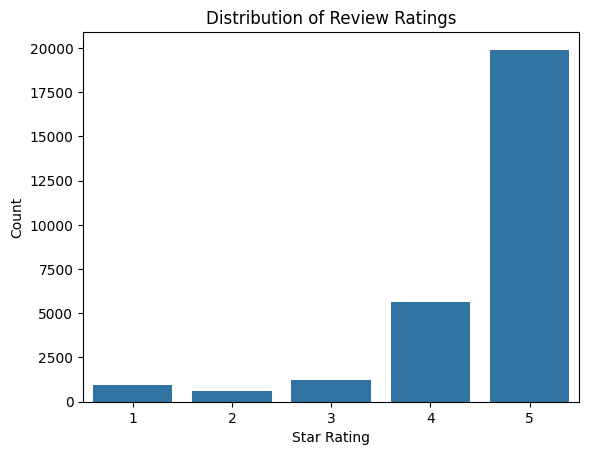

In [25]:
sns.countplot(x='reviews.rating', data=df)
plt.title("Distribution of Review Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.show()


In [26]:
df = df[['reviews.text', 'reviews.rating']]
df = df.dropna()

In [27]:
df.head()

,reviews.text,reviews.rating
0,I order 3 of them and one of the item is bad q...,3
1,Bulk is always the less expensive way to go fo...,4
2,Well they are not Duracell but for the price i...,5
3,Seem to work as well as name brand batteries a...,5
4,These batteries are very long lasting the pric...,5


# Mapping Star Ratings to Sentiment Classes

In [28]:
def map_sentiment(rate):
    if rate in [1, 2]:
        return 0  # Negative
    elif rate == 3:
        return 1  # Neutral
    else:
        return 2  # Positive

In [29]:
df['label'] = df['reviews.rating'].apply(map_sentiment)

In [30]:
df.head()

,reviews.text,reviews.rating,label
0,I order 3 of them and one of the item is bad q...,3,1
1,Bulk is always the less expensive way to go fo...,4,2
2,Well they are not Duracell but for the price i...,5,2
3,Seem to work as well as name brand batteries a...,5,2
4,These batteries are very long lasting the pric...,5,2


In [31]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [32]:
dataset = Dataset.from_pandas(df[['reviews.text', 'label']].rename(columns={'reviews.text': 'text'}))

In [33]:
def tokenize(example):
    return tokenizer(example['text'], truncation=True, padding=True)

dataset = dataset.map(tokenize, batched=True)

Map:   0%|          | 0/28332 [00:00<?, ? examples/s]

# Train/test split


In [34]:
dataset = dataset.train_test_split(test_size=0.2)
train_dataset = dataset['train']
test_dataset = dataset['test']

# Load and Train Model

In [35]:
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [36]:
training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy='epoch',
    save_strategy='epoch',
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    load_best_model_at_end=True,
    logging_steps=10,
)

In [37]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)

    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }


In [38]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

<ipython-input-38-c87722262378>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [39]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.117800,0.180814,0.938945,0.935636,0.938945,0.934322
2,0.085300,0.147413,0.958708,0.958226,0.958708,0.958450
3,0.014000,0.158976,0.961532,0.959828,0.961532,0.960574


TrainOutput(global_step=4251, training_loss=0.1394560317682171, metrics={'train_runtime': 762.5233, 'train_samples_per_second': 89.171, 'train_steps_per_second': 5.575, 'total_flos': 9007281400826880.0, 'train_loss': 0.1394560317682171, 'epoch': 3.0})

# Model Evaluating

In [40]:
metrics = trainer.evaluate()
print(metrics)

{'eval_loss': 0.14741308987140656, 'eval_accuracy': 0.9587083112758074, 'eval_precision': 0.9582256595217303, 'eval_recall': 0.9587083112758074, 'eval_f1': 0.9584498834361267, 'eval_runtime': 20.3646, 'eval_samples_per_second': 278.278, 'eval_steps_per_second': 17.432, 'epoch': 3.0}


              precision    recall  f1-score   support

    Negative       0.85      0.82      0.83       318
     Neutral       0.57      0.56      0.57       233
    Positive       0.98      0.99      0.98      5116

    accuracy                           0.96      5667
   macro avg       0.80      0.79      0.79      5667
weighted avg       0.96      0.96      0.96      5667



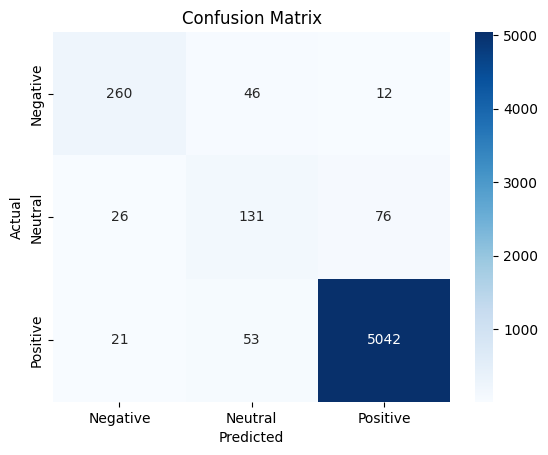

In [41]:
predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)
labels = predictions.label_ids

print(classification_report(labels, preds, target_names=["Negative", "Neutral", "Positive"]))

#Confusion Matrix
cm = confusion_matrix(labels, preds)
sns.heatmap(cm, annot=True, fmt='d',cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save model and tokenizer
model.save_pretrained("./sentiment-model")
tokenizer.save_pretrained("./sentiment-model")


('./sentiment-model/tokenizer_config.json',
 './sentiment-model/special_tokens_map.json',
 './sentiment-model/vocab.txt',
 './sentiment-model/added_tokens.json',
 './sentiment-model/tokenizer.json')

# Try upsampling negative/neutral samples to make balance

In [42]:
# Split training dataset by class
neg = train_dataset.filter(lambda x: x['label'] == 0)
neu = train_dataset.filter(lambda x: x['label'] == 1)
pos = train_dataset.filter(lambda x: x['label'] == 2)

# Find the max
max_size = max(len(neg), len(neu), len(pos))

# upsample function
def upsample(dataset, target_size):
    dataset = dataset.shuffle(seed=42)
    indices = [i % len(dataset) for i in range(target_size)]
    return dataset.select(indices)

# Upsample the smaller classes
upsampled_neg = upsample(neg, max_size)
upsampled_neu = upsample(neu, max_size)
upsampled_pos = pos

from datasets import concatenate_datasets
train_dataset_balanced = concatenate_datasets([upsampled_neg, upsampled_neu, upsampled_pos]).shuffle(seed=42)


Filter:   0%|          | 0/22665 [00:00<?, ? examples/s]

Filter:   0%|          | 0/22665 [00:00<?, ? examples/s]

Filter:   0%|          | 0/22665 [00:00<?, ? examples/s]

In [43]:
balanced_df = train_dataset_balanced.to_pandas()
# Check how many examples per class
balanced_df['label'].value_counts()

,count
label,
1,20429
2,20429
0,20429


In [44]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_balanced,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)


<ipython-input-44-55afe22e9d21>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [45]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.006000,0.300157,0.954826,0.957251,0.954826,0.955897
2,0.000300,0.290144,0.963296,0.963518,0.963296,0.963389
3,0.001700,0.324927,0.961355,0.961445,0.961355,0.961399


TrainOutput(global_step=11493, training_loss=0.04142812524589568, metrics={'train_runtime': 1958.6888, 'train_samples_per_second': 93.869, 'train_steps_per_second': 5.868, 'total_flos': 2.4356022731633664e+16, 'train_loss': 0.04142812524589568, 'epoch': 3.0})

{'eval_loss': 0.2901444733142853, 'eval_accuracy': 0.9632962766896065, 'eval_precision': 0.9635182888561737, 'eval_recall': 0.9632962766896065, 'eval_f1': 0.9633894371815094, 'eval_runtime': 20.4646, 'eval_samples_per_second': 276.917, 'eval_steps_per_second': 17.347, 'epoch': 3.0}
              precision    recall  f1-score   support

    Negative       0.85      0.88      0.87       318
     Neutral       0.64      0.64      0.64       233
    Positive       0.99      0.98      0.98      5116

    accuracy                           0.96      5667
   macro avg       0.82      0.83      0.83      5667
weighted avg       0.96      0.96      0.96      5667



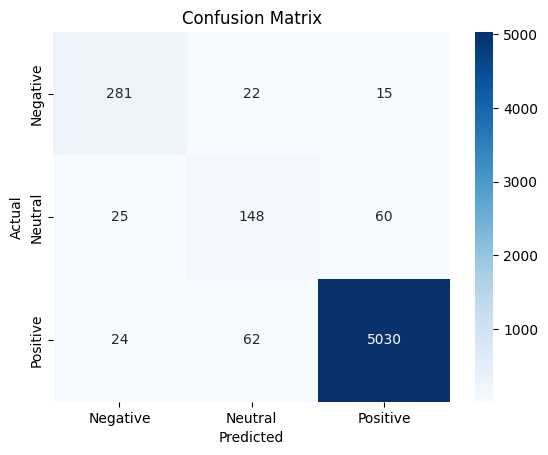

In [47]:
metrics = trainer.evaluate()
print(metrics)

predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)
labels = predictions.label_ids

# Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(labels, preds, target_names=["Negative", "Neutral", "Positive"]))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(labels, preds)
sns.heatmap(cm, annot=True, fmt='d',cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [48]:
# Save the model and tokenizer
model.save_pretrained("./sentiment-model-balanced")
tokenizer.save_pretrained("./sentiment-model-balanced")

('./sentiment-model-balanced/tokenizer_config.json',
 './sentiment-model-balanced/special_tokens_map.json',
 './sentiment-model-balanced/vocab.txt',
 './sentiment-model-balanced/added_tokens.json',
 './sentiment-model-balanced/tokenizer.json')

# Try Roberte Model

In [49]:
from transformers import RobertaTokenizerFast, RobertaForSequenceClassification

tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base')


In [50]:
def tokenize(example):
    return tokenizer(example['text'], truncation=True, padding=True)

dataset = dataset.map(tokenize, batched=True)

Map:   0%|          | 0/22665 [00:00<?, ? examples/s]

Map:   0%|          | 0/5667 [00:00<?, ? examples/s]

In [51]:
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [52]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


In [53]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_balanced,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)


<ipython-input-53-55afe22e9d21>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [54]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.449700,0.442109,0.865890,0.929596,0.865890,0.890777
2,0.239700,0.447272,0.890065,0.934982,0.890065,0.906545
3,0.126000,0.368518,0.919358,0.940394,0.919358,0.927677


TrainOutput(global_step=11493, training_loss=0.47988715966750006, metrics={'train_runtime': 3767.0605, 'train_samples_per_second': 48.808, 'train_steps_per_second': 3.051, 'total_flos': 4.837629609688781e+16, 'train_loss': 0.47988715966750006, 'epoch': 3.0})

{'eval_loss': 0.368518203496933, 'eval_accuracy': 0.9193576848420681, 'eval_precision': 0.9403937366419215, 'eval_recall': 0.9193576848420681, 'eval_f1': 0.9276766713688411, 'eval_runtime': 37.3731, 'eval_samples_per_second': 151.633, 'eval_steps_per_second': 9.499, 'epoch': 3.0}
              precision    recall  f1-score   support

    Negative       0.66      0.79      0.72       318
     Neutral       0.38      0.65      0.48       233
    Positive       0.98      0.94      0.96      5116

    accuracy                           0.92      5667
   macro avg       0.67      0.79      0.72      5667
weighted avg       0.94      0.92      0.93      5667



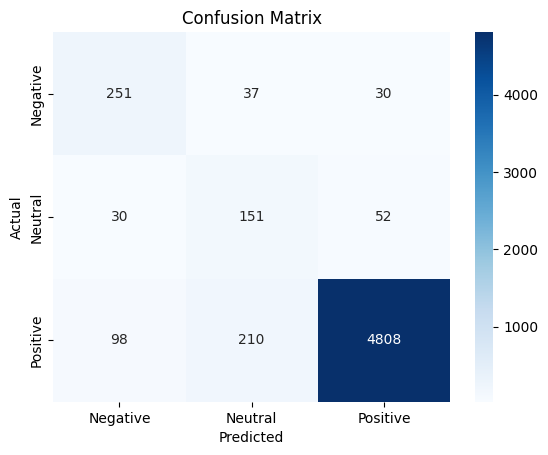

In [55]:
metrics = trainer.evaluate()
print(metrics)

predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)
labels = predictions.label_ids

# Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(labels, preds, target_names=["Negative", "Neutral", "Positive"]))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(labels, preds)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

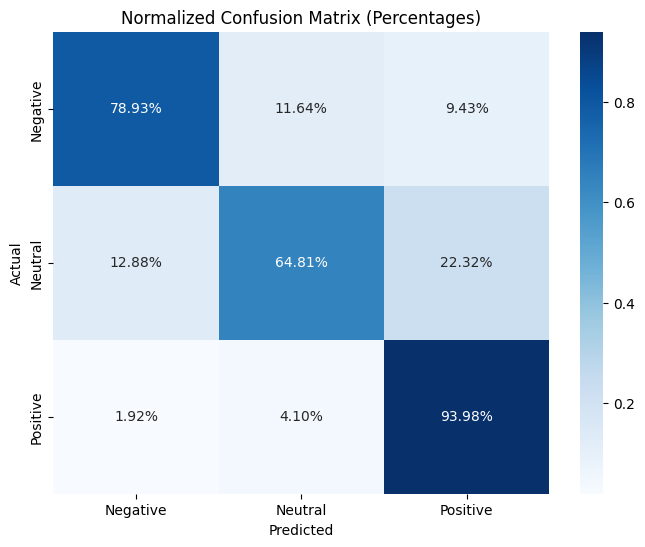

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labels, preds)

# Normalize the confusion matrix
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt=".2%", cmap="Blues",
            xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Percentages)')
plt.show()


In [ ]:
# Save the model and tokenizer
model.save_pretrained("./sentiment-model-roberta")
tokenizer.save_pretrained("./sentiment-model-roberta")

# 2. Product Category Clustering


# Import Important Library

In [64]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


# Load data and Prepare Data


In [65]:
df = pd.read_csv("/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")


# EDA

In [66]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [67]:
df['primaryCategories'].value_counts().head(10)

,count
primaryCategories,
Electronics,13995
Health & Beauty,12071
"Toys & Games,Electronics",1676
"Office Supplies,Electronics",386
"Electronics,Media",185
Office Supplies,9
Animals & Pet Supplies,6
Home & Garden,2
"Electronics,Furniture",2


In [68]:
df['categories'].value_counts().head(10)

,count
categories,
"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Robot Check,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batteries & Chargers,Health, Household & Baby Care,Health Personal Care",8343
"AA,AAA,Electronics Features,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batteries & Chargers,Health, Household & Baby Care,Health Personal Care",3728
"Fire Tablets,Tablets,All Tablets,Amazon Tablets,Genuine Tablet Accessories,Computers & Tablets,Electronics,Amazon",2443
"Fire Tablets,Tablets,All Tablets,Amazon Tablets,Computers & Tablets",2407
"Fire Tablets,Computers/Tablets & Networking,Electronics Features,Tablets,All Tablets,Amazon Tablets,Computers & Tablets,Electronics,iPad & Tablets,Tablets & eBook Readers",2370
"Fire Tablets,Learning Toys,Toys,Tablets,Amazon Tablets,Electronics, Tech Toys, Movies, Music,Computers & Tablets,Kids' Tablets,Electronics,iPad & Tablets,Tablets for Kids",1676
"Computers,Fire Tablets,Electronics Features,Computer Accessories,Tablets,Top Rated,Amazon Tablets,Electronics,Kids' Tablets,iPad & Tablets,Cases & Bags,Electronics, Tech Toys, Movies, Music,Computers & Tablets",1425
"Fire Tablets,Computers/Tablets & Networking,Tablets,All Tablets,Amazon Tablets,Frys,Computers & Tablets,Tablets & eBook Readers",1024
"Fire Tablets,Computers/Tablets & Networking,Tablets,All Tablets,Amazon Tablets,Computers & Tablets,Tablets & eBook Readers",987


# Prepare Category text

In [69]:
df['all_categories'] = df['categories'].fillna('') + ' ' + df['primaryCategories'].fillna('')
df['all_categories'] = df['all_categories'].str.replace('[^a-zA-Z0-9 ]', '', regex=True).str.lower()

# Load BERT model

In [70]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [71]:
texts = df['all_categories'].tolist()
embeddings = model.encode(texts, show_progress_bar=True)

Batches:   0%|          | 0/886 [00:00<?, ?it/s]

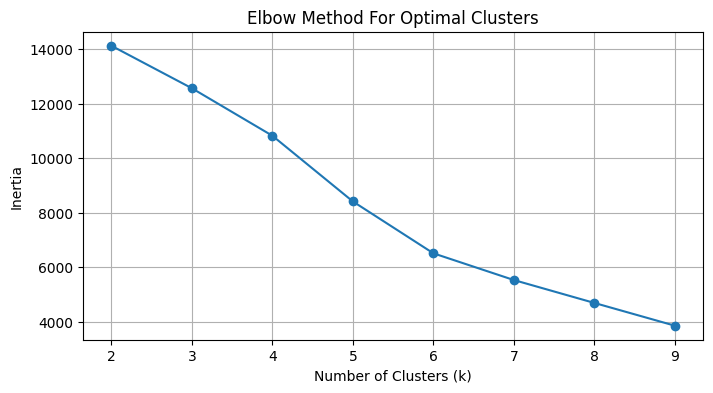

In [87]:
inertia = []
K_range = range(2, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [76]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(embeddings)

In [77]:
for i in range(df['cluster'].nunique()):
    print(f"\n Cluster {i}")
    sample = df[df['cluster'] == i]['all_categories'].sample(5, random_state=42)
    for item in sample:
        print("-", item)


 Cluster 0
- aaaaaelectronics featureshealthelectronicshealth  householdcamcorder batteriescamera  photobatterieshousehold batteriesaccessoriescamera batterieshealth and beautyhousehold suppliesbatteries  chargershealth household  baby carehealth personal care health  beauty
- aaaaaelectronics featureshealthelectronicshealth  householdcamcorder batteriescamera  photobatterieshousehold batteriesaccessoriescamera batterieshealth and beautyhousehold suppliesbatteries  chargershealth household  baby carehealth personal care health  beauty
- aaaaaelectronics featureshealthelectronicshealth  householdcamcorder batteriescamera  photobatterieshousehold batteriesaccessoriescamera batterieshealth and beautyhousehold suppliesbatteries  chargershealth household  baby carehealth personal care health  beauty
- aaaaaelectronics featureshealthelectronicshealth  householdcamcorder batteriescamera  photobatterieshousehold batteriesaccessoriescamera batterieshealth and beautyhousehold suppliesbatteries 

#  Map cluster to Meta Category

In [80]:
cluster_to_meta = {
    0: "Health & Household",
    1: "Fire Tablets & Electronics",
    2: "Health & Household Batteries",
    3: "E-Readers & Tablets",
    4: "Kids Tech & Educational Toys"
}

df['meta_category'] = df['cluster'].map(cluster_to_meta)


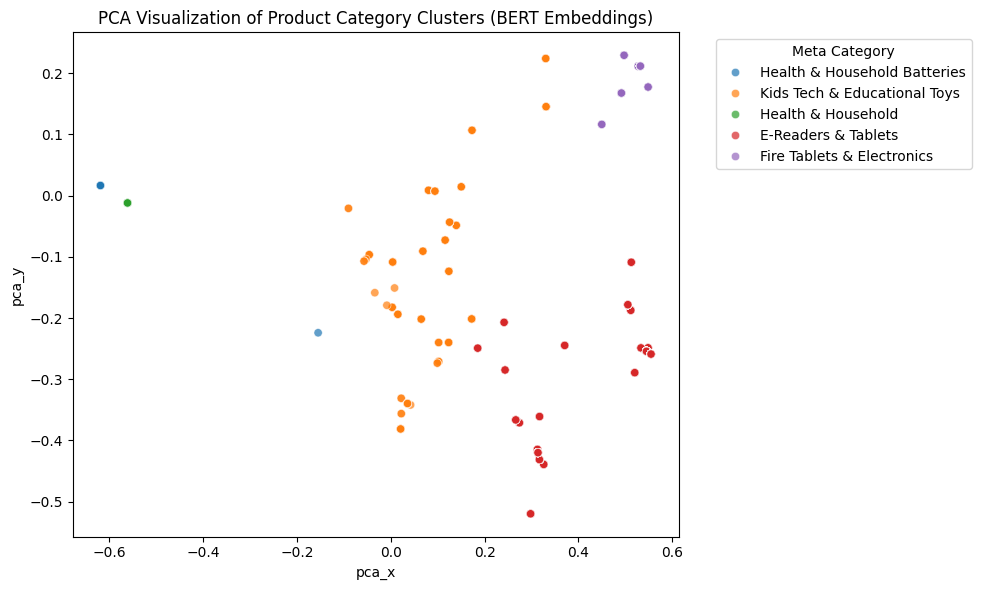

In [81]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)
df['pca_x'] = reduced[:, 0]
df['pca_y'] = reduced[:, 1]

# 10. Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca_x', y='pca_y', hue='meta_category', palette='tab10', alpha=0.7)
plt.title('PCA Visualization of Product Category Clusters (BERT Embeddings)')
plt.legend(title='Meta Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [83]:
print("\nMeta-Category Distribution:")
print(df['meta_category'].value_counts())


Meta-Category Distribution:
meta_category
Health & Household Batteries    8344
E-Readers & Tablets             6283
Fire Tablets & Electronics      6070
Kids Tech & Educational Toys    3907
Health & Household              3728
Name: count, dtype: int64


In [85]:
# Save the SentenceTransformer model
model.save("sentence_transformer_model")

from joblib import dump
# Save the KMeans model
dump(kmeans, 'kmeans_model.joblib')


['kmeans_model.joblib']